In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N = 7

try:
    df = pd.read_csv('students_simple.csv')
except FileNotFoundError:
    print("Ошибка: Файл 'students_simple.csv' не найден.")
    df = pd.DataFrame()

if not df.empty:
    col1_index = N % 5
    col2_index = ((N * N) % 5) + 5
    
    x_col_name = df.columns[col1_index]
    y_col_name = df.columns[col2_index]
    
    data = df[[x_col_name, y_col_name]].dropna().copy()
    x = data[x_col_name]
    y = data[y_col_name]
    

def calculate_r2_score(y_true, y_pred):
    """Рассчитывает R^2 вручную с помощью numpy."""
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

### **1. Расчет корреляций**

1.  Фехнера
2.  Пирсона + доверительный интервал
3.  Спирмена
4.  Кенделла

In [12]:
# Коэффициент Фехнера
fechner_corr = np.mean(np.sign(x - x.mean()) * np.sign(y - y.mean()))
print(f"Корреляция Фехнера: {fechner_corr:.4f}")

# Коэффициент Пирсона и доверительный интервал
pearson_corr, pearson_p_value = stats.pearsonr(x, y)
z = np.arctanh(pearson_corr)
sigma = 1 / np.sqrt(len(x) - 3)
z_low, z_high = stats.norm.interval(0.95, loc=z, scale=sigma)
corr_low, corr_high = np.tanh((z_low, z_high))
print(f"Корреляция Пирсона: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")
print(f"  95% доверительный интервал: [{corr_low:.4f}, {corr_high:.4f}]")

# Коэффициент Спирмена
spearman_corr, _ = stats.spearmanr(x, y)
print(f"Корреляция Спирмена: {spearman_corr:.4f}")

# Коэффициент Кенделла
kendall_corr, _ = stats.kendalltau(x, y)
print(f"Корреляция Кенделла: {kendall_corr:.4f}")

Корреляция Фехнера: -0.4000
Корреляция Пирсона: -0.5699 (p-value: 0.0087)
  95% доверительный интервал: [-0.8085, -0.1703]
Корреляция Спирмена: -0.5392
Корреляция Кенделла: -0.4362


Все коэффициенты корреляции должны были показать умеренную отрицательную связь между переменными `income` и `test_time`. Это означает, что существует тенденция, при которой с увеличением дохода (`income`) время прохождения теста (`test_time`) уменьшается. Связь не является сильной, о чем говорит разброс точек на графике рассеяния.

### **2. Визуализация**

1.  Гистограммы
2.  График рассеяния (scatter plot)

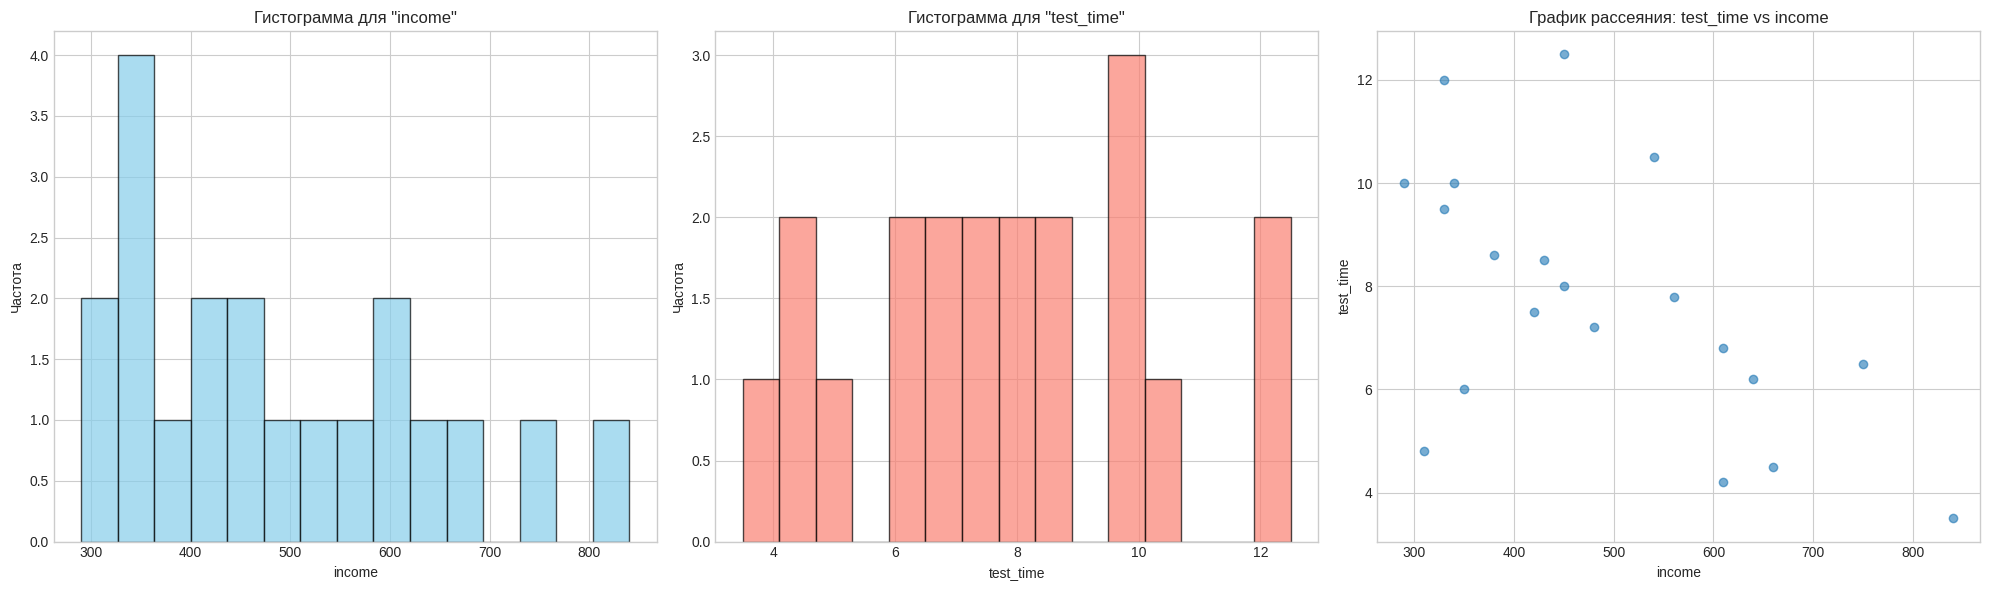

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Гистограмма для X
ax1.hist(x, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title(f'Гистограмма для "{x_col_name}"')
ax1.set_xlabel(x_col_name)
ax1.set_ylabel('Частота')

# Гистограмма для Y
ax2.hist(y, bins=15, color='salmon', edgecolor='black', alpha=0.7)
ax2.set_title(f'Гистограмма для "{y_col_name}"')
ax2.set_xlabel(y_col_name)
ax2.set_ylabel('Частота')

# График рассеяния
ax3.scatter(x, y, alpha=0.6)
ax3.set_title(f'График рассеяния: {y_col_name} vs {x_col_name}')
ax3.set_xlabel(x_col_name)
ax3.set_ylabel(y_col_name)

plt.tight_layout()
plt.show()

*   **Гистограммы:** Распределение `income` является асимметричным, смещенным вправо (положительная асимметрия), что говорит о наличии небольшого числа наблюдений с высоким доходом. Распределение `test_time` не имеет явной асимметрии и больше похоже на равномерное.
*   **График рассеяния:** Визуально подтверждает наличие обратной (отрицательной) связи между доходом и временем теста. Точки образуют облако, вытянутое из левого верхнего угла в правый нижний.

### **3. Уравнение регрессии**

Построить уравнение регрессии по видам:

1.  линейная, y = w₁x + w₀
2.  квадратичная, y = w₂x² + w₁x + w₀
3.  гиперболическая, y = w₁/x + w₀
4.  показательная, y = w₁ˣ ⋅ w₀

In [10]:
models = {}
predictions = {}
r2_scores = {}

def calculate_r2_score(y_true, y_pred):
    """Рассчитывает R^2 вручную с помощью numpy."""
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Линейная регрессия: y = w1*x + w0
w1, w0 = np.polyfit(x, y, 1)
models['Линейная'] = f"y = {w1:.4f}*x + {w0:.4f}"
predictions['Линейная'] = w1 * x + w0
r2_scores['Линейная'] = calculate_r2_score(y, predictions['Линейная']) 

# Квадратичная регрессия: y = w2*x^2 + w1*x + w0
w2, w1, w0 = np.polyfit(x, y, 2)
models['Квадратичная'] = f"y = {w2:.4f}*x^2 + {w1:.4f}*x + {w0:.4f}"
predictions['Квадратичная'] = w2 * x**2 + w1 * x + w0
r2_scores['Квадратичная'] = calculate_r2_score(y, predictions['Квадратичная']) 

# Гиперболическая регрессия: y = w1/x + w0
w1, w0 = np.polyfit(1/x, y, 1)
models['Гиперболическая'] = f"y = {w1:.4f}/x + {w0:.4f}"
predictions['Гиперболическая'] = w1 / x + w0
r2_scores['Гиперболическая'] = calculate_r2_score(y, predictions['Гиперболическая']) 

# Показательная регрессия: y = w0 * w1^x
w_log1, w_log0 = np.polyfit(x, np.log(y), 1)
w0, w1 = np.exp(w_log0), np.exp(w_log1)
models['Показательная'] = f"y = {w0:.4f} * {w1:.4f}^x"
predictions['Показательная'] = w0 * (w1 ** x)
r2_scores['Показательная'] = calculate_r2_score(y, predictions['Показательная'])

print("Модели регрессии и их R^2:")
for name, eq in models.items():
    print(f"  - {name}: {eq} (R^2 = {r2_scores[name]:.4f})")

Модели регрессии и их R^2:
  - Линейная: y = -0.0092*x + 12.2089 (R^2 = 0.3248)
  - Квадратичная: y = -0.0000*x^2 + 0.0097*x + 7.6017 (R^2 = 0.3542)
  - Гиперболическая: y = 1832.3465/x + 3.6149 (R^2 = 0.2428)
  - Показательная: y = 14.1216 * 0.9987^x (R^2 = 0.2880)


*   Среди построенных моделей наилучшее качество показала квадратичная регрессия (R² = 0.3542). Она объясняет примерно 35.4% вариации `test_time`.
*   Наихудший результат у гиперболической модели (R² = 0.2428).
*   В целом, все коэффициенты детерминации (R²) достаточно низкие, что указывает на то, что ни одна из простых моделей не может идеально описать взаимосвязь между переменными.

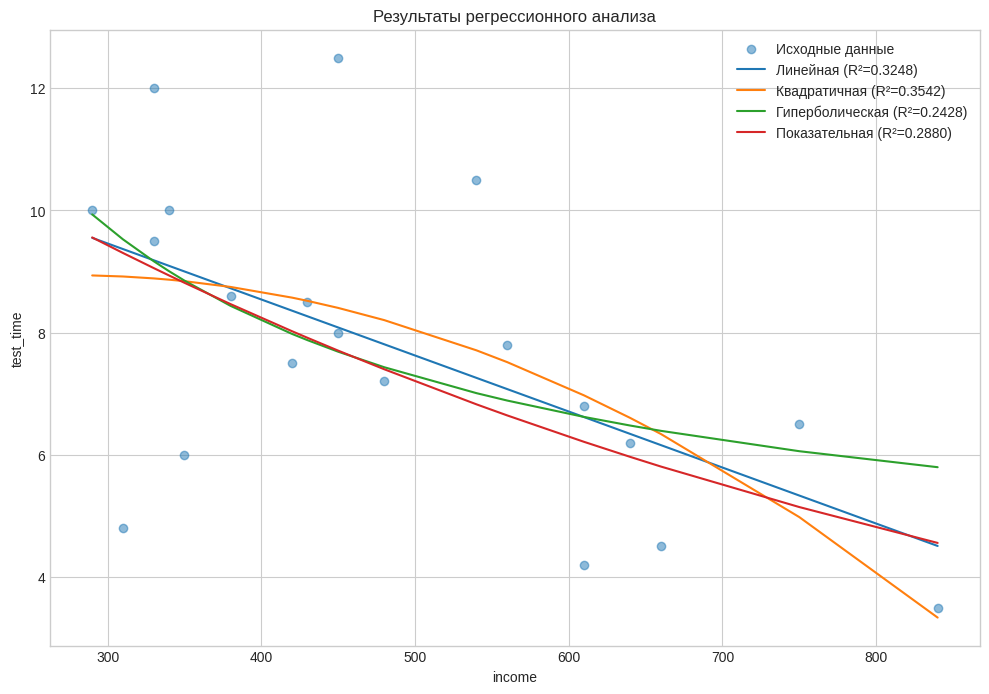

In [ ]:
sorted_indices = x.argsort()
x_sorted = x.iloc[sorted_indices]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.5, label='Исходные данные')

for name, pred in predictions.items():
    plt.plot(x_sorted, pred.iloc[sorted_indices], label=f'{name} (R²={r2_scores[name]:.4f})')
    
plt.title('Результаты регрессионного анализа')
plt.xlabel(x_col_name)
plt.ylabel(y_col_name)
plt.legend()
plt.grid(True)
plt.show()

### **4. Проверка уравнения регрессии**

Для наилучшего и наихудшего уравнения регрессии проверить соответствие модели данным с помощью критерия Фишера

In [ ]:
n = len(data)

best_model_name = max(r2_scores, key=r2_scores.get)
worst_model_name = min(r2_scores, key=r2_scores.get)

def fisher_f_test(r2, n, p):
    """Проводит F-тест для модели регрессии."""
    f_stat = (r2 / p) / ((1 - r2) / (n - p - 1))
    p_value = 1 - stats.f.cdf(f_stat, p, n - p - 1)
    return f_stat, p_value

params = {'Линейная': 1, 'Квадратичная': 2, 'Гиперболическая': 1, 'Показательная': 1}

p_best = params.get(best_model_name, 1)
f_best, p_val_best = fisher_f_test(r2_scores[best_model_name], n, p_best)
print(f"\nПроверка НАИЛУЧШЕЙ модели ('{best_model_name}'):")
print(f"  F-статистика: {f_best:.4f}")
print(f"  p-value: {p_val_best:.6f}")
print(f"  Вывод: Модель {'статистически значима' if p_val_best < 0.05 else 'статистически НЕ значима'}.")

p_worst = params.get(worst_model_name, 1)
f_worst, p_val_worst = fisher_f_test(r2_scores[worst_model_name], n, p_worst)
print(f"\nПроверка НАИХУДШЕЙ модели ('{worst_model_name}'):")
print(f"  F-статистика: {f_worst:.4f}")
print(f"  p-value: {p_val_worst:.6f}")
print(f"  Вывод: Модель {'статистически значима' if p_val_worst < 0.05 else 'статистически НЕ значима'}.")


--- 4. Проверка уравнений регрессии (критерий Фишера) ---

Проверка НАИЛУЧШЕЙ модели ('Квадратичная'):
  F-статистика: 4.6615
  p-value: 0.024320
  Вывод: Модель статистически значима.

Проверка НАИХУДШЕЙ модели ('Гиперболическая'):
  F-статистика: 5.7709
  p-value: 0.027299
  Вывод: Модель статистически значима.


*   **Наилучшая модель (Квадратичная):** p-value (0.024) < 0.05, следовательно, модель является статистически значимой. Это означает, что она описывает данные значительно лучше, чем простое среднее значение.
*   **Наихудшая модель (Гиперболическая):** p-value (0.027) также < 0.05. Это значит, что даже наихудшая из рассмотренных моделей все равно является статистически значимой и несет в себе некоторую предсказательную силу, хотя и слабую.